<a href="https://colab.research.google.com/github/jopelle/Practica3_Ingenieria_Software/blob/master/Entregable1_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entregable 1 Visualización de los datos**

**Importar librerías**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# La siguiente línea se utiliza para generar los gráficos en formato SVG los cuales son más legibles. 
%config InlineBackend.figure_format = 'svg'

**Cargar dataset de entrenamiento**

In [3]:
!unzip ia1920.zip
traindf = pd.read_csv("train.csv")

Archive:  ia1920.zip
  inflating: test.csv                
  inflating: train.csv               


**Visualización de los datos**

Desccriptores cuantitativos (En este dataset son todos)

HISTOGRAMAS

In [15]:
traindf.columns

Index(['SL', 'EEG', 'BP', 'HR', 'CIRCULATION', 'ACTIVITY'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9e615d828>,
      dtype=object)

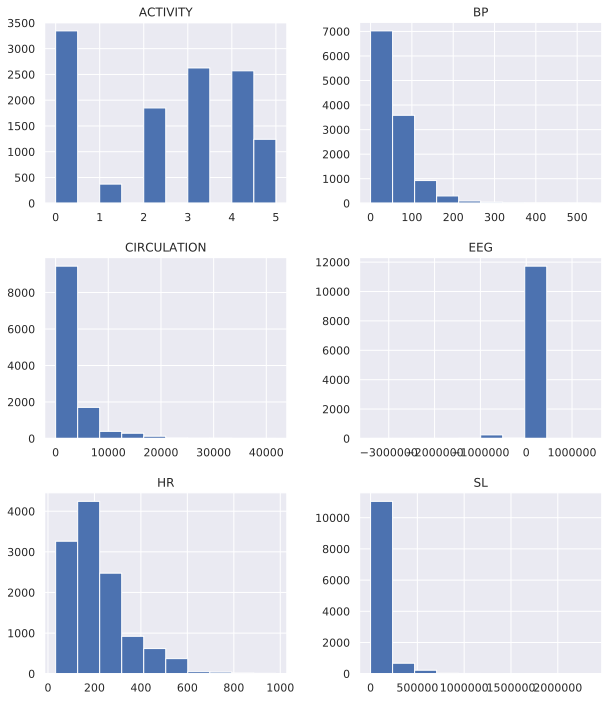

In [43]:
traindf[traindf.columns].hist(figsize=(10, 12))

GRAFICOS DE DENSIDAD

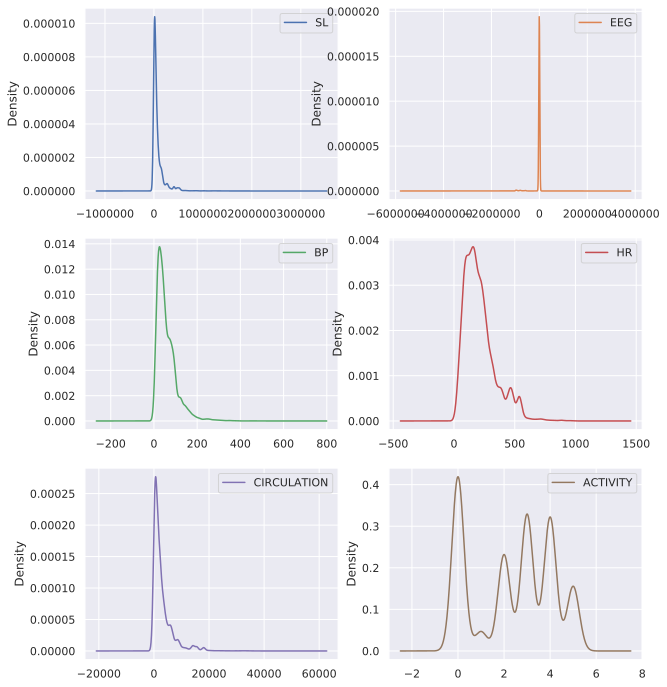

In [45]:
traindf[traindf.columns].plot(kind='density', subplots=True, layout=(3, 2), 
                  sharex=False, figsize=(10, 12));